In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys
import mpl_scatter_density
import mplhep as hep
import matplotlib
import mpl_scatter_density

sys.path.append('../')
from utils import load
import torch

In [2]:
epoch = 1

In [3]:
prefix = '/export/home/phys/kyungmip/L1DeepMETv2/'

ckpts = f'{prefix}/ckpts_Feb25_norm_momentum_binned_response_lr_0p1/'

### Plot straight from the histogram saved in resolutions file

In [4]:
plt.style.use(hep.style.CMS)

a=load(ckpts + '/best.resolutions')
colors = {
#    'pfMET': 'black',
    'puppiMET': 'red',
#    'deepMETResponse': 'blue',
#    'deepMETResolution': 'green',
    'MET':  'magenta',
}
label_arr = {
    'MET':     'Graph MET' ,
#    'pfMET':    'PF MET',
    'puppiMET': 'PUPPI MET',
#    'deepMETResponse': 'DeepMETResponse',
#    'deepMETResolution': 'DeepMETResolution',
}
resolutions_arr = {
    'MET':      [[],[],[]],
#    'pfMET':    [[],[],[]],
    'puppiMET': [[],[],[]],
#    'deepMETResponse': [[],[],[]],
#    'deepMETResolution': [[],[],[]],
}

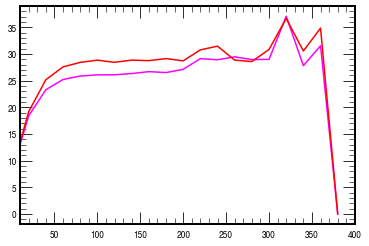

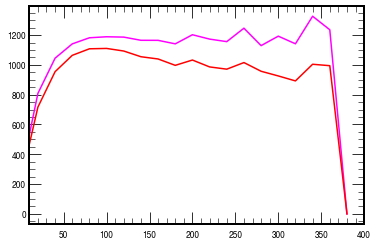

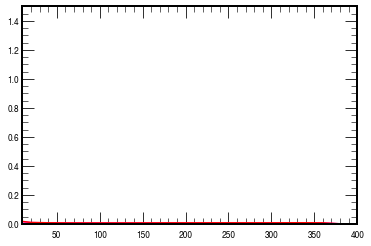

In [5]:
for key in resolutions_arr:
    #plt.figure(1)
    #xx = a[key]['u_perp_resolution'][1][0:40]
    #yy = a[key]['u_perp_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(2)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    #plt.figure(3)
    #xx = a[key]['u_par_resolution'][1][0:40]
    #yy = a[key]['u_par_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(4)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    plt.figure(5)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    
    plt.xlim([10,400])
    plt.ylim([0,1.5])

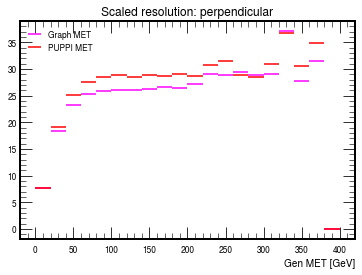

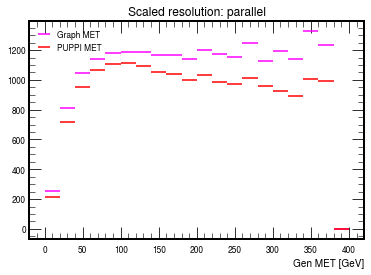

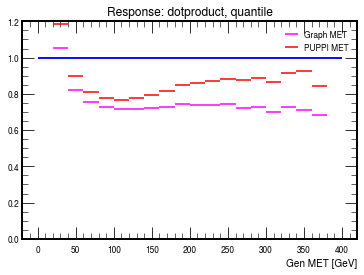

In [6]:
for key in resolutions_arr:
    # perp resolution scaled
    plt.figure(1)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: perpendicular')
    
    # parallel resolution scaled
    plt.figure(2)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]

    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: parallel')
    
    # response (using quantile)
    plt.figure(3)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0] * 128
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')

    #plt.xlim([10,400])
    plt.ylim([0,1.2])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response: dotproduct, quantile')


In [7]:
genMETx = glob.glob('{}/epoch{}_genMETx*'.format(ckpts, epoch))[0]
genMETy = glob.glob('{}/epoch{}_genMETy*'.format(ckpts, epoch))[0]

#genMETx = glob.glob('{}/epoch{}_true_px*'.format(ckpts, epoch))[0]
#genMETy = glob.glob('{}/epoch{}_true_py*'.format(ckpts, epoch))[0]

METx = glob.glob('{}/epoch{}_METx*'.format(ckpts, epoch))[0]
METy = glob.glob('{}/epoch{}_METy*'.format(ckpts, epoch))[0]

puppiMETx = glob.glob('{}/epoch{}_puppiMETx*'.format(ckpts, epoch))[0]
puppiMETy = glob.glob('{}/epoch{}_puppiMETy*'.format(ckpts, epoch))[0]

In [8]:
genMETx = np.loadtxt(genMETx, delimiter=',')
genMETy = np.loadtxt(genMETy, delimiter=',')

METx = np.loadtxt(METx, delimiter=',')
METy = np.loadtxt(METy, delimiter=',')

puppiMETx = np.loadtxt(puppiMETx, delimiter=',')
puppiMETy = np.loadtxt(puppiMETy, delimiter=',')

### Plot predicted vs. gen MET

(-600.0, 600.0)

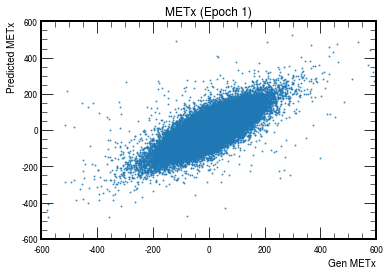

In [9]:
plt.scatter(genMETx, 128*METx, s=1, alpha=0.7)
plt.xlabel('Gen METx')
plt.ylabel('Predicted METx')
plt.title(f'METx (Epoch {epoch})')

plt.xlim([-600,600])
plt.ylim([-600,600])

(-600.0, 600.0)

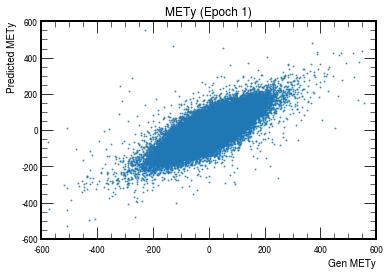

In [10]:
plt.scatter(genMETy, 128*METy, s=1, alpha=0.7)
plt.xlabel('Gen METy')
plt.ylabel('Predicted METy')
plt.title(f'METy (Epoch {epoch})')

plt.xlim([-600,600])
plt.ylim([-600,600])

In [11]:
genMET = np.sqrt(genMETx **2 + genMETy **2)
MET = 128*np.sqrt(METx **2 + METy **2)
puppiMET = np.sqrt(puppiMETx **2 + puppiMETy **2)

<ipython-input-12-1fc4d325c3ba>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(genMET, MET, s=0.1, alpha=0.7, norm=matplotlib.colors.LogNorm(), cmap='jet')


(0.0, 500.0)

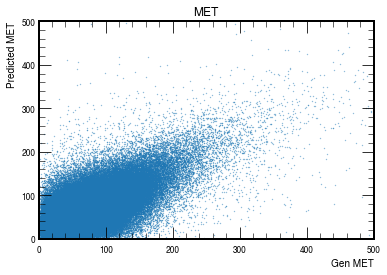

In [12]:
plt.scatter(genMET, MET, s=0.1, alpha=0.7, norm=matplotlib.colors.LogNorm(), cmap='jet')

#plt.colorbar()

plt.xlabel('Gen MET')
plt.ylabel('Predicted MET')
plt.title(f'MET')

plt.xlim([0,500])
plt.ylim([0,500])

In [13]:
# density plot
def plot_density(x, y, xlabel='', ylabel='', title='', zlabel='', xlim=[], doSave=False, figName='plot'):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1, projection='scatter_density')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    if len(xlim) != 0:
        ax1.set_xlim(xlim)
    ax1.set_title(title)

    density = ax1.scatter_density(x, y, cmap=plt.cm.get_cmap('magma'))
    fig1.colorbar(density, ax=ax1, fraction=0.045, pad=0.015, label=zlabel)
    
    if doSave:
        plt.savefig('{}.pdf'.format(figName),  bbox_inches='tight')
    
    plt.show()

### Calculate and plot the response

In [14]:
response_pT = MET / genMET

In [15]:
response_pT.mean()

1.1767471659225925

In [16]:
puppiMET = 128*puppiMET

In [17]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(genMET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(genMET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))

# Take the mean for each bin
response = ml_means / truth_means

In [18]:
# mean of puppiMET 
# in the bin of genMET
# for example, the events in the first genMET bin [0,20], the mean of the puppiMET is puppi_means[0]
puppi_means

array([ 48.07888093,  51.4107163 ,  58.9881677 ,  68.39628052,
        79.52142945,  92.29837203, 107.8576173 , 125.65875592,
       144.05521688, 166.01948268, 185.30605406, 206.06043993,
       226.07040512, 241.38630598, 261.35662559, 273.68865393,
       309.56303477, 327.91216002, 318.46912311, 380.03706538])

In [19]:
truth_means

array([ 13.26398198,  30.79088003,  50.18161772,  69.77791354,
        89.49588351, 109.19222027, 128.98310357, 149.0613522 ,
       168.89982776, 188.99171145, 209.16320013, 229.4585657 ,
       248.88791303, 269.41867614, 289.60909075, 309.85467656,
       330.12071591, 348.94234532, 370.81705341, 389.67338279])

In [20]:
ml_means

array([ 42.85578101,  46.24155162,  53.61625184,  62.8184343 ,
        73.50926352,  85.25854465,  99.37654415, 114.56627165,
       129.97690884, 147.99635034, 163.77591533, 178.95425749,
       195.99020782, 204.34594123, 220.43573577, 220.41672171,
       238.45600605, 261.91502426, 251.3740325 , 281.83347793])

In [21]:
binnings

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])

In [22]:
response

array([3.23098908, 1.50179376, 1.06844407, 0.90026243, 0.82137033,
       0.78081153, 0.77046172, 0.76858468, 0.76955027, 0.78308381,
       0.7830054 , 0.77989792, 0.78746374, 0.75846984, 0.76114923,
       0.71135516, 0.72232973, 0.75059685, 0.67789232, 0.72325566])

Text(0.5, 1.0, 'px, py, pT scaled by 128')

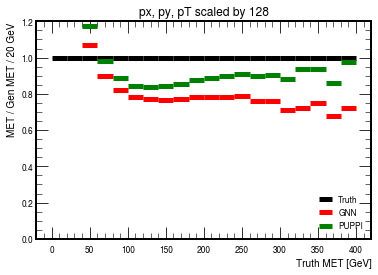

In [23]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Truth MET [GeV]')
plt.legend(loc='lower right')
plt.ylabel(f'MET / Gen MET / {binnings[1]-binnings[0]:.0f} GeV')

plt.title('px, py, pT scaled by 128')

### resolution

In [24]:
qTx = torch.from_numpy(genMETx)
qTy = torch.from_numpy(genMETy)

v_qT = torch.stack((qTx, qTy), dim=1)

v_qT

tensor([[-41.0682,  19.6210],
        [  7.5862, -35.8078],
        [-61.7640,  25.8271],
        ...,
        [ 40.2423, -35.7987],
        [ 25.7949,  13.2900],
        [-10.9817, -33.0468]], dtype=torch.float64)

In [31]:
MLMETx = 128*torch.from_numpy(METx)
MLMETy = 128*torch.from_numpy(METy)

v_MET = torch.stack((MLMETx, MLMETy), dim=1)
v_MET

tensor([[ -38.3645,   36.6765],
        [  -7.4257,  -14.4997],
        [-103.3497,   37.4646],
        ...,
        [ -55.6768,   40.7677],
        [  -6.2210,  -18.3205],
        [  33.2962,  -52.9212]], dtype=torch.float64)

In [32]:
PUPPIMETx = 128*torch.from_numpy(puppiMETx)
PUPPIMETy = 128*torch.from_numpy(puppiMETy)

v_puppiMET = torch.stack((PUPPIMETx, PUPPIMETy), dim=1)

v_puppiMET

tensor([[ -32.4055,   57.1678],
        [ -10.7766,  -12.8349],
        [-106.2891,   39.3668],
        ...,
        [ -66.6749,   34.7338],
        [  -5.4327,  -27.8433],
        [  18.4523,  -58.3702]], dtype=torch.float64)

In [33]:
# tensor operations
def getdot(vx, vy):
    return torch.einsum('bi,bi->b',vx,vy)

def getscale(vx):
    return torch.sqrt(getdot(vx,vx))

def scalermul(a,v):
    return torch.einsum('b,bi->bi',a,v)

In [34]:
resolutions_arr = {}

def compute(vector):
    #response = getdot(vector,v_qT)/getdot(v_qT,v_qT)
    response = getscale(vector)/getscale(v_qT)

    v_paral_predict = scalermul(response, v_qT)
    u_paral_predict = getscale(v_paral_predict) - getscale(v_qT)
    v_perp_predict = vector - v_paral_predict
    u_perp_predict = getscale(v_perp_predict)
    
    return [u_perp_predict.numpy(), u_paral_predict.numpy(), response.numpy()]

In [35]:
resolutions_arr['MET'] = compute(v_MET)
resolutions_arr['puppiMET'] = compute(v_puppiMET)

In [36]:
resolutions_arr['MET'][2]

array([1.16611622, 0.4450664 , 1.64206735, ..., 1.28120262, 0.66677218,
       1.7954545 ])

In [37]:
resolutions_arr['puppiMET'][2]

array([1.44378884, 0.45786941, 1.69306963, ..., 1.3958135 , 0.97763776,
       1.75792385])

In [38]:
# compute mean of all metrics in summary

qT_arr = genMET

max_x=400 # max qT value
x_n=20 # number of bins

bin_edges=np.arange(0, max_x, max_x/x_n)

inds=np.digitize(qT_arr, bin_edges)

qT_hist=[]
for i in range(1, len(bin_edges)):
    qT_hist.append((bin_edges[i]+bin_edges[i-1])/2.)
    
qT_hist

[10.0,
 30.0,
 50.0,
 70.0,
 90.0,
 110.0,
 130.0,
 150.0,
 170.0,
 190.0,
 210.0,
 230.0,
 250.0,
 270.0,
 290.0,
 310.0,
 330.0,
 350.0,
 370.0]

In [39]:
resolution_hists = {}

In [40]:
for key in resolutions_arr:
    R_arr=resolutions_arr[key][2] 
    u_perp_arr=resolutions_arr[key][0]
    u_par_arr=resolutions_arr[key][1]

    u_perp_hist=[]
    u_perp_scaled_hist=[]
    u_par_hist=[]
    u_par_scaled_hist=[]
    R_hist=[]

    for i in range(1, len(bin_edges)):
        R_i=abs(R_arr[np.where(inds==i)[0]])
        R_hist.append(np.mean(R_i))
            
        u_perp_i=u_perp_arr[np.where(inds==i)[0]]
        u_perp_scaled_i=u_perp_i/np.mean(R_i)
        u_perp_hist.append((np.quantile(u_perp_i,0.84)-np.quantile(u_perp_i,0.16))/2.)
        u_perp_scaled_hist.append((np.quantile(u_perp_scaled_i,0.84)-np.quantile(u_perp_scaled_i,0.16))/2.)
            
        u_par_i=u_par_arr[np.where(inds==i)[0]]
        u_par_scaled_i=u_par_i/np.mean(R_i)
        u_par_hist.append((np.quantile(u_par_i,0.84)-np.quantile(u_par_i,0.16))/2.)
        u_par_scaled_hist.append((np.quantile(u_par_scaled_i,0.84)-np.quantile(u_par_scaled_i,0.16))/2.)

    u_perp_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_perp_hist)
    u_perp_scaled_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_perp_scaled_hist)
    u_par_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_par_hist)
    u_par_scaled_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_par_scaled_hist)
        
    R=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=R_hist)
        
    resolution_hists[key] = {
        'u_perp_resolution': u_perp_resolution,
        'u_perp_scaled_resolution': u_perp_scaled_resolution,
        'u_par_resolution': u_par_resolution,
        'u_par_scaled_resolution':u_par_scaled_resolution,
        'R': R
    }

In [41]:
resolution_hists

{'MET': {'u_perp_resolution': (array([36.48898813, 31.45995117, 26.96677484, 24.34291517, 22.54129388,
          21.56981226, 21.3473353 , 21.60611644, 21.60777958, 22.64845505,
          22.71935263, 25.04130146, 24.81754042, 22.22513774, 24.5576469 ,
          22.22372615, 32.37025596, 23.91634097, 35.15462328,  0.        ]),
   array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
          220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])),
  'u_perp_scaled_resolution': (array([ 8.72222832, 20.34099886, 25.03380351, 26.96251213, 27.40267991,
          27.61733778, 27.70826706, 28.11718665, 28.08387827, 28.92329145,
          29.01078906, 32.11698539, 31.52029039, 29.30229359, 32.26129336,
          31.22452327, 44.84390185, 31.84592237, 51.85515634,  0.        ]),
   array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
          220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])),
  'u_par_resolution': (array([24.48297994,

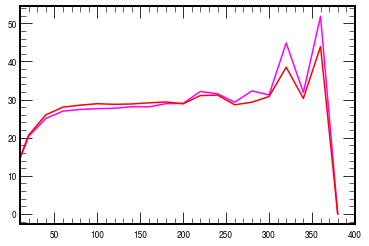

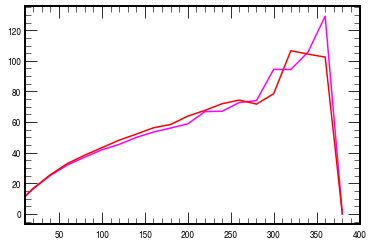

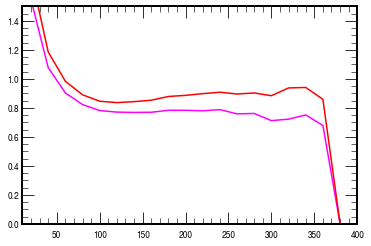

In [42]:
a = resolution_hists

for key in resolutions_arr:
    #plt.figure(1)
    #xx = a[key]['u_perp_resolution'][1][0:40]
    #yy = a[key]['u_perp_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(2)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    #plt.figure(3)
    #xx = a[key]['u_par_resolution'][1][0:40]
    #yy = a[key]['u_par_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(4)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    plt.figure(5)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    
    plt.xlim([10,400])
    plt.ylim([0,1.5])
    


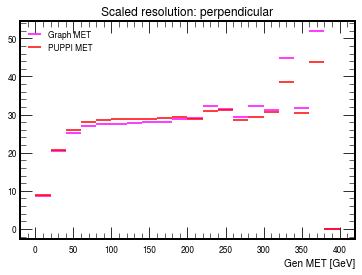

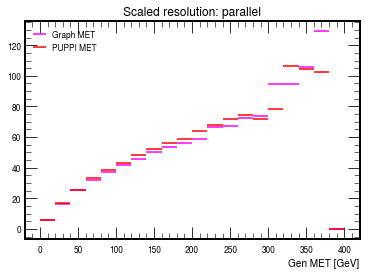

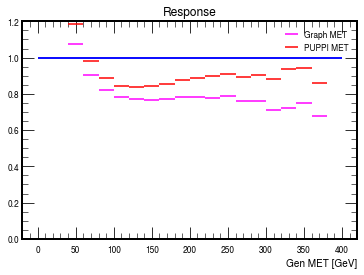

In [43]:
for key in resolutions_arr:
    # perp resolution scaled
    plt.figure(1)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: perpendicular')
    
    # parallel resolution scaled
    plt.figure(2)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]

    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: parallel')
    
    # response (using quantile)
    plt.figure(3)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')

    #plt.xlim([10,400])
    plt.ylim([0,1.2])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response')


In [44]:
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

#truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))

gen_MET = []
ml_MET = []
puppi_MET = []

for i in range(len(binnings)-1):
    mask_genMET = (genMET >= binnings[i]) & (genMET < binnings[i+1])
    
    idx_event = np.where(mask_genMET)
    
    gen_MET.append(genMET[idx_event])
    ml_MET.append(MET[idx_event])
    puppi_MET.append(puppiMET[idx_event])

In [45]:
binnings

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])

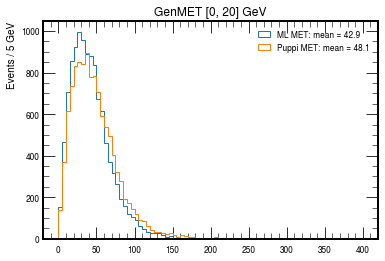

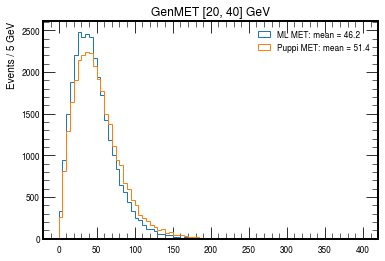

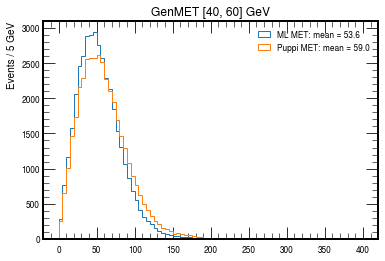

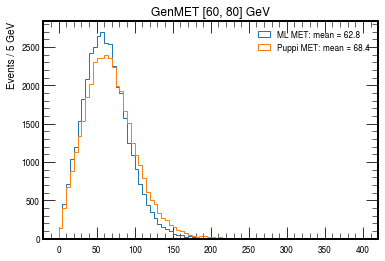

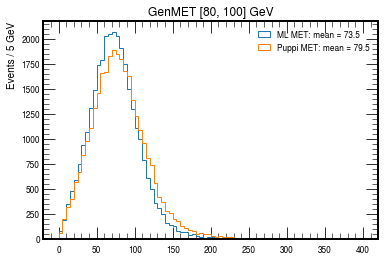

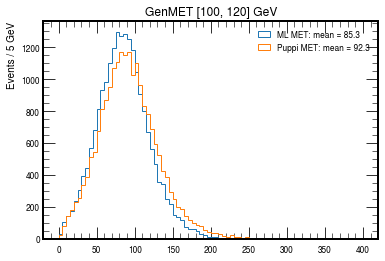

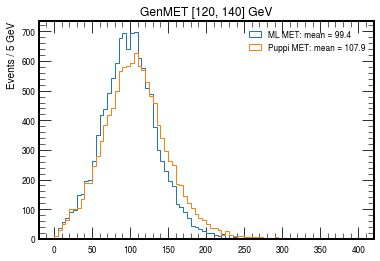

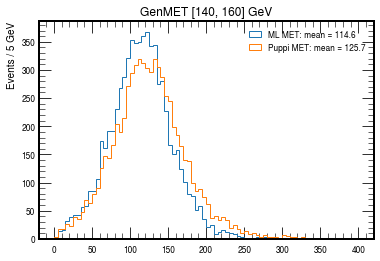

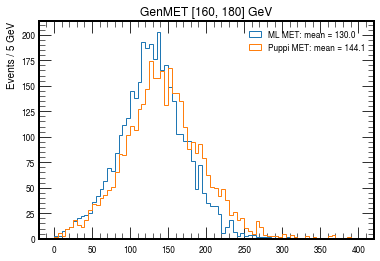

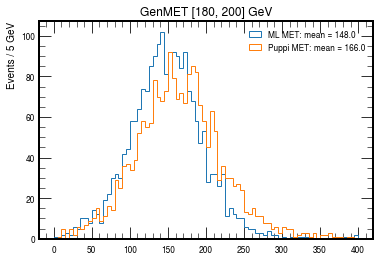

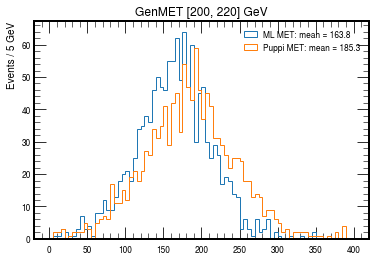

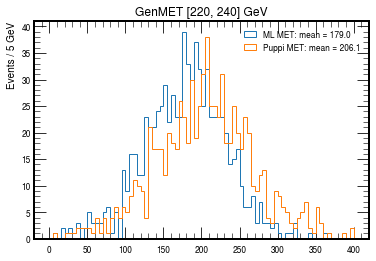

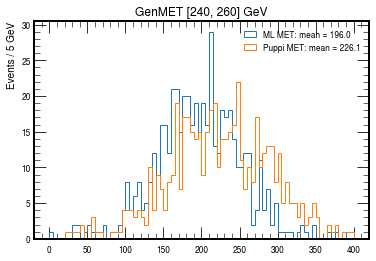

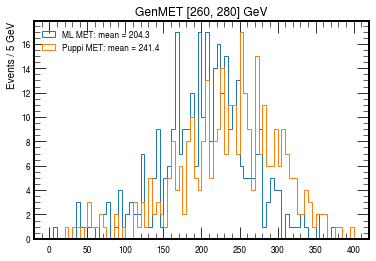

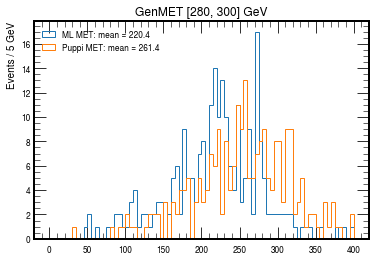

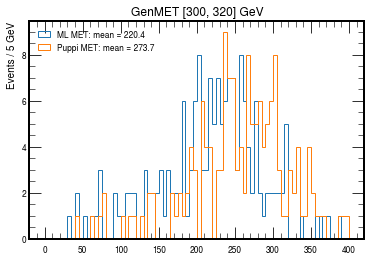

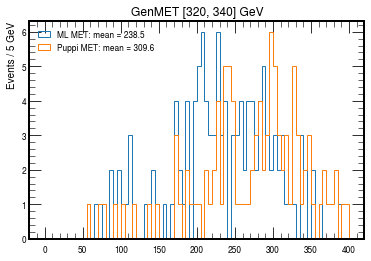

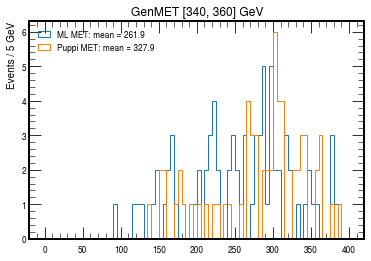

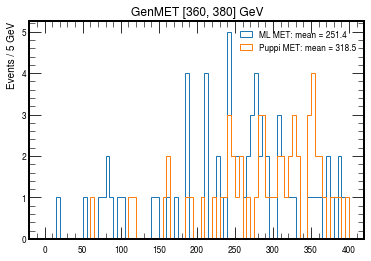

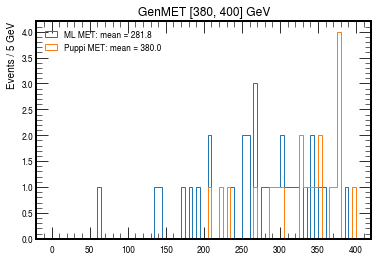

In [46]:
hist_bins = np.linspace(0, 400, num=80+1)

bin_i = 0

for bin_i in range(len(ml_MET)):
    plt.figure()
    
    plt.hist(ml_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'ML MET: mean = {ml_MET[bin_i].mean():.1f}')
    #plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=True, label='Gen MET')
    plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')


    plt.ylabel('Events / 5 GeV')

    plt.title(f'GenMET [{binnings[bin_i]:.0f}, {binnings[bin_i+1]:.0f}] GeV')
    plt.legend()
    
    plt.show()

In [53]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(MET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(MET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(MET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))


Text(0.5, 1.0, 'Response correction')

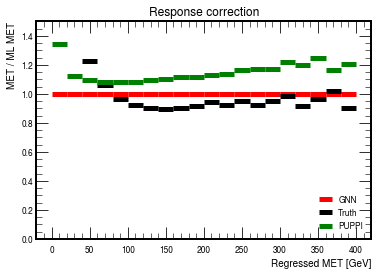

In [54]:
plt.hlines(ml_means/ml_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(truth_means/ml_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(puppi_means/ml_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.5)
plt.xlabel('Regressed MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / ML MET')

plt.title('Response correction')

Text(0.5, 1.0, 'Response')

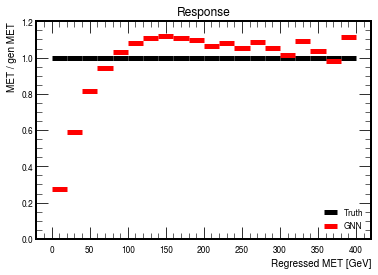

In [55]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
#plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
#               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Regressed MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / gen MET')

plt.title('Response')

In [56]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(puppiMET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(puppiMET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(puppiMET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))

# Take the mean for each bin
response = ml_means / truth_means

Text(0.5, 1.0, 'Response correction')

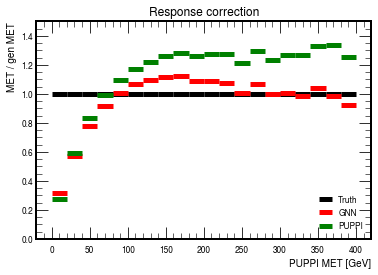

In [57]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.5)
plt.xlabel('PUPPI MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / gen MET')

plt.title('Response correction')

In [58]:
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

#truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))

gen_MET = []
ml_MET = []
puppi_MET = []

for i in range(len(binnings)-1):
    mask_mlMET = (MET >= binnings[i]) & (MET < binnings[i+1])
    
    idx_event = np.where(mask_mlMET)
    
    gen_MET.append(genMET[idx_event])
    ml_MET.append(MET[idx_event])
    puppi_MET.append(puppiMET[idx_event])

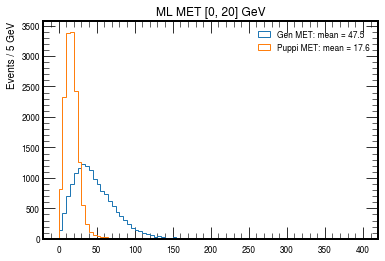

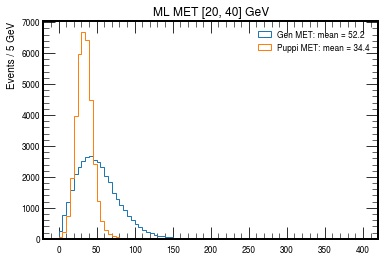

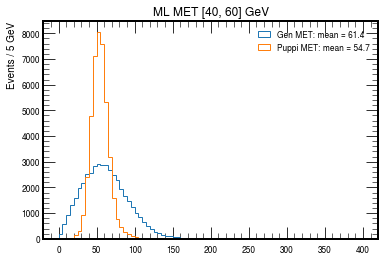

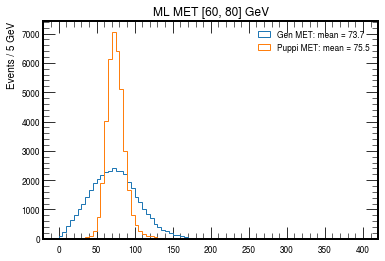

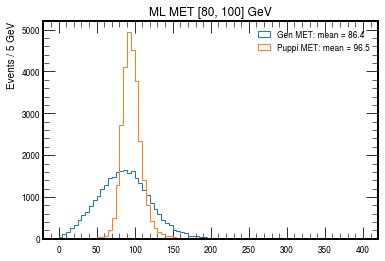

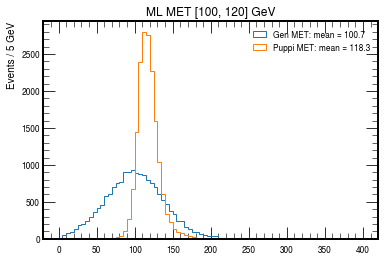

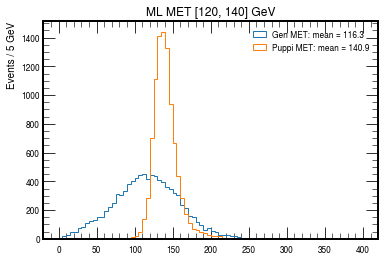

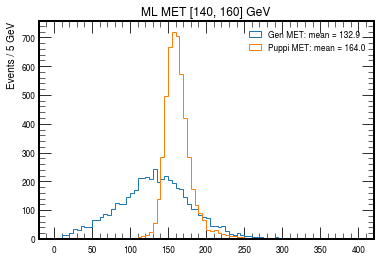

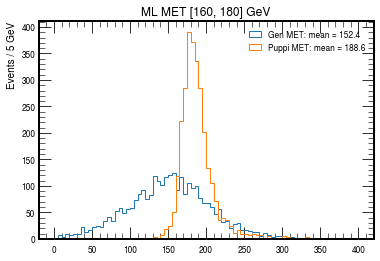

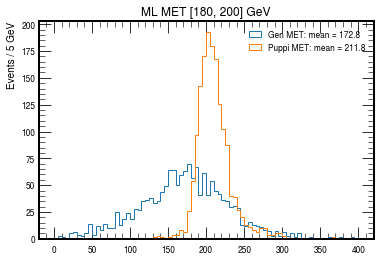

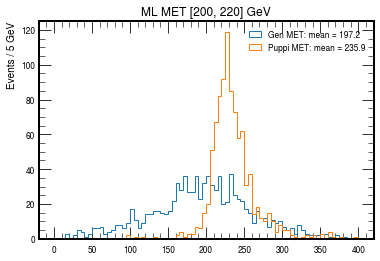

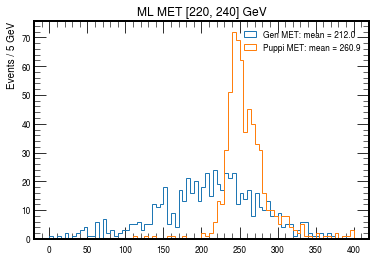

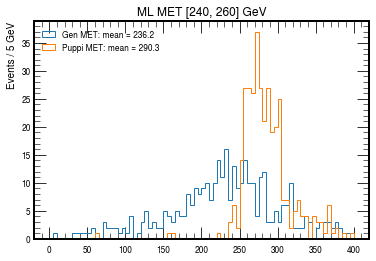

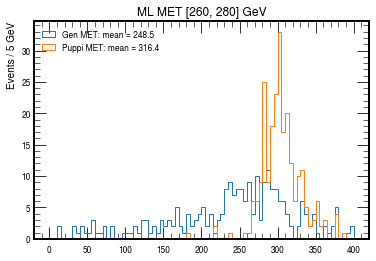

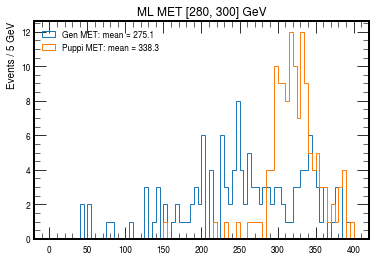

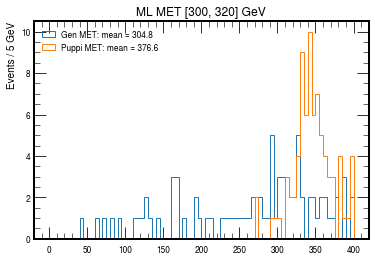

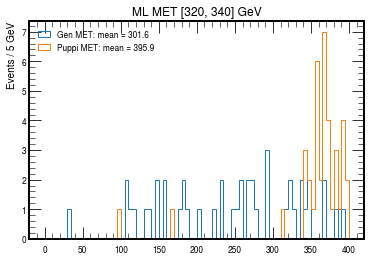

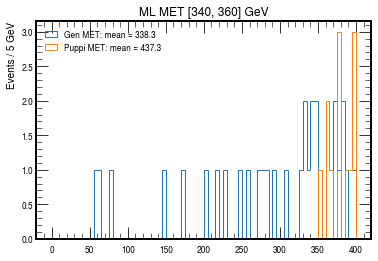

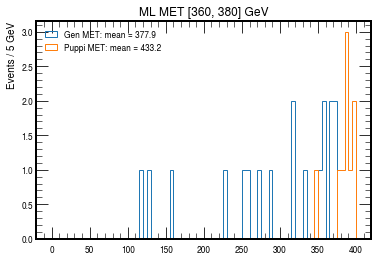

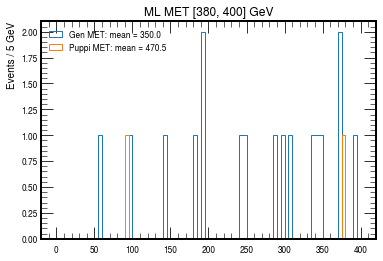

In [59]:
hist_bins = np.linspace(0, 400, num=80+1)

bin_i = 0

for bin_i in range(len(ml_MET)):
    plt.figure()
    
    #plt.hist(ml_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'ML MET: mean = {ml_MET[bin_i].mean():.1f}')
    plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Gen MET: mean = {gen_MET[bin_i].mean():.1f}')
    plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')

    plt.ylabel('Events / 5 GeV')

    plt.title(f'ML MET [{binnings[bin_i]:.0f}, {binnings[bin_i+1]:.0f}] GeV')
    plt.legend()
    
    plt.show()

### Plot MET

In [60]:
genMET = np.array(genMET)
genMET_binned = []

nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

for idx in range(len(binnings)-1):
    genMET_binned.append( np.logical_and(genMET > binnings[idx], genMET < binnings[idx+1]) )

In [61]:
MLMET = np.array(MET)
MLMET_binned = []

for idx in range(len(binnings)-1):
    MLMET_binned.append( np.logical_and(MLMET > binnings[idx], MLMET < binnings[idx+1]) )

In [62]:
puppiMET = np.array(puppiMET)
puppiMET_binned = []

for idx in range(len(binnings)-1):
    puppiMET_binned.append( np.logical_and(puppiMET > binnings[idx], puppiMET < binnings[idx+1]) )

In [63]:
genMET_binned_entries = [sum(genMET_binned[i]) for i in range(len(genMET_binned))]

In [64]:
MLMET_binned_entries = [sum(MLMET_binned[i]) for i in range(len(MLMET_binned))]

In [65]:
MLMET_binned_entries

[14794,
 35500,
 43600,
 38783,
 28111,
 17189,
 9509,
 5073,
 2895,
 1606,
 948,
 611,
 354,
 254,
 151,
 106,
 59,
 41,
 32,
 27]

In [66]:
genMET_binned_entries

[11348,
 30211,
 39173,
 38584,
 31198,
 20808,
 11936,
 6806,
 3731,
 2080,
 1262,
 806,
 525,
 342,
 243,
 170,
 125,
 80,
 73,
 36]

In [67]:
puppiMET_binned_entries = [sum(puppiMET_binned[i]) for i in range(len(puppiMET_binned))]

In [68]:
import ROOT as r

hGenMET = r.TH1D('genMET', 'genMET', nbins, 0, 400)
hMLMET = r.TH1D('MLMET', 'MLMET', nbins, 0, 400)
hPuppiMET = r.TH1D('PuppiMET', 'puppiMET', nbins, 0, 400)

Welcome to JupyROOT 6.24/02


In [69]:
for i in range(nbins):
    hGenMET.SetBinContent(i+1, genMET_binned_entries[i])
    hMLMET.SetBinContent(i+1, MLMET_binned_entries[i])
    hPuppiMET.SetBinContent(i+1, puppiMET_binned_entries[i])

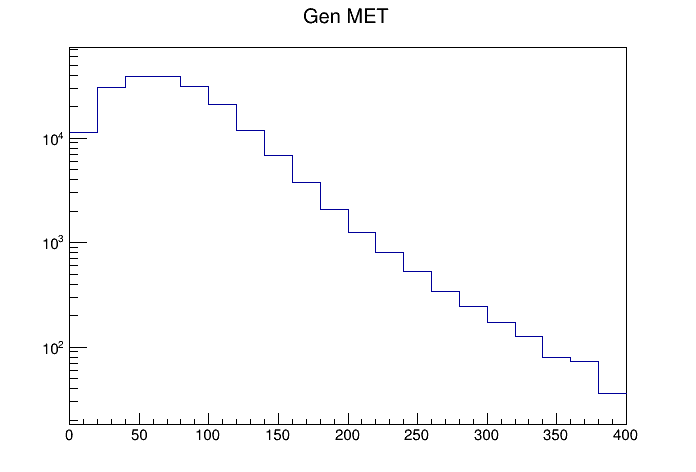

In [70]:
r.gStyle.SetOptStat(0)

c = r.TCanvas()

'''
hMLMET.Draw()
hMLMET.GetXaxis().SetTitle('MET')
hMLMET.GetYaxis().SetTitle('Events / 20GeV')
hMLMET.SetTitle('MET')
'''

hGenMET.Draw()
hGenMET.SetTitle('Gen MET')

'''
hPuppiMET.Draw('SAME')

hMLMET.SetLineColor(2)
hGenMET.SetLineColor(4)
hPuppiMET.SetLineColor(6)

legend = r.TLegend(0.6,0.65,0.9,0.85)
r.gStyle.SetLegendBorderSize(0)
legend.AddEntry(hMLMET,"ML MET","f")
legend.AddEntry(hGenMET,"GenMET","l")
legend.AddEntry(hPuppiMET, "PuppiMET")
legend.Draw('SAME')

'''
c.SetLogy()

c.Draw()